In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress
import seaborn as sns

combined = ("F:/Data Science Class SMU/SMU/project-1/Resources/cleanDataMileagePriceEngineSize.csv")
combinedDf = pd.read_csv(combined)

print(combinedDf)

       model  year  price transmission  mileage fuelType  tax   mpg  \
0       Aygo  2017   9250       Manual     4414    Other  150  68.9   
1       Aygo  2017   7100       Manual    32351   Petrol    0  68.9   
2       Aygo  2016   6500       Manual    26193   Petrol    0  69.0   
3       Aygo  2017   7650       Manual    12134   Petrol    0  68.9   
4       Aygo  2016   6999       Manual    21123   Petrol    0  69.0   
...      ...   ...    ...          ...      ...      ...  ...   ...   
14228  Focus  2018  14000       Manual     8724   Diesel  145  74.3   
14229  Focus  2017  18500       Manual    10960   Petrol  145  41.5   
14230  Focus  2017  11000       Manual    17339   Petrol  145  60.1   
14231  Focus  2016  16000       Manual    19834   Petrol  200  41.5   
14232  Focus  2015   9999       Manual     7010   Diesel   20  67.3   

       engineSize  
0             1.0  
1             1.0  
2             1.0  
3             1.0  
4             1.0  
...           ...  
14228  

In [14]:
combinedDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14233 entries, 0 to 14232
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         14233 non-null  object 
 1   year          14233 non-null  int64  
 2   price         14233 non-null  int64  
 3   transmission  14233 non-null  object 
 4   mileage       14233 non-null  int64  
 5   fuelType      14233 non-null  object 
 6   tax           14233 non-null  int64  
 7   mpg           14233 non-null  float64
 8   engineSize    14233 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1000.9+ KB


In [15]:
combinedDf.describe()

,year,price,mileage,tax,mpg,engineSize
count,14233.000000,14233.000000,14233.000000,14233.000000,14233.000000,14233.000000
mean,2017.161877,11139.578304,18815.396684,102.344551,61.492391,1.199129
std,1.530949,3432.803084,12428.901613,64.191562,9.063270,0.286962
min,2013.000000,3891.000000,1.000000,0.000000,34.500000,1.000000
25%,2016.000000,8695.000000,9283.000000,20.000000,56.500000,1.000000
50%,2017.000000,10498.000000,16222.000000,145.000000,60.100000,1.000000
75%,2018.000000,12995.000000,26533.000000,145.000000,65.700000,1.500000
max,2020.000000,26995.000000,58500.000000,265.000000,88.300000,2.300000


In [16]:
mask = (combinedDf["model"] == "Fiesta")
fiestaModel = combinedDf.loc[mask,:]
fiestaModel

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
3891,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
3892,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
3893,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
3894,Fiesta,2015,10500,Manual,35432,Petrol,145,47.9,1.6
3895,Fiesta,2017,9000,Manual,13054,Petrol,145,54.3,1.2
...,...,...,...,...,...,...,...,...,...
10054,Fiesta,2019,15999,Manual,2813,Petrol,145,58.9,1.0
10055,Fiesta,2015,8999,Manual,24546,Petrol,0,65.7,1.0
10056,Fiesta,2017,9899,Automatic,16303,Petrol,0,57.7,1.0
10057,Fiesta,2018,12500,Automatic,7047,Petrol,145,48.7,1.0


In [17]:
mask = (combinedDf["model"] == "Focus")
focusModel = combinedDf.loc[mask,:]
focusModel

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10059,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
10060,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
10061,Focus,2018,10000,Manual,48141,Petrol,145,61.4,1.0
10062,Focus,2017,18499,Manual,13063,Petrol,145,41.5,2.0
10063,Focus,2019,18990,Manual,8400,Petrol,145,60.1,1.0
...,...,...,...,...,...,...,...,...,...
14228,Focus,2018,14000,Manual,8724,Diesel,145,74.3,1.5
14229,Focus,2017,18500,Manual,10960,Petrol,145,41.5,2.0
14230,Focus,2017,11000,Manual,17339,Petrol,145,60.1,1.0
14231,Focus,2016,16000,Manual,19834,Petrol,200,41.5,2.0


In [18]:
mask = (combinedDf["model"] == "Yaris")
yarisModel = combinedDf.loc[mask,:]
yarisModel

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
1882,Yaris,2019,14000,Automatic,6821,Petrol,150,47.9,1.5
1883,Yaris,2018,10750,Manual,14000,Petrol,145,58.9,1.5
1884,Yaris,2016,11500,Automatic,31911,Hybrid,0,78.0,1.5
1885,Yaris,2017,8750,Manual,32594,Petrol,150,58.9,1.5
1886,Yaris,2019,15000,Automatic,1401,Hybrid,140,76.3,1.5
...,...,...,...,...,...,...,...,...,...
3886,Yaris,2017,8995,Manual,21049,Petrol,30,58.0,1.3
3887,Yaris,2019,15251,Automatic,4144,Hybrid,135,76.3,1.5
3888,Yaris,2013,8695,Automatic,39364,Petrol,30,55.4,1.3
3889,Yaris,2014,7200,Manual,28801,Petrol,30,58.9,1.0


In [19]:
mask = (combinedDf["model"] == "Aygo")
aygoModel = combinedDf.loc[mask,:]
aygoModel

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Aygo,2017,9250,Manual,4414,Other,150,68.9,1.0
1,Aygo,2017,7100,Manual,32351,Petrol,0,68.9,1.0
2,Aygo,2016,6500,Manual,26193,Petrol,0,69.0,1.0
3,Aygo,2017,7650,Manual,12134,Petrol,0,68.9,1.0
4,Aygo,2016,6999,Manual,21123,Petrol,0,69.0,1.0
...,...,...,...,...,...,...,...,...,...
1877,Aygo,2017,9595,Automatic,7618,Other,145,67.3,1.0
1878,Aygo,2019,9694,Manual,100,Petrol,145,56.5,1.0
1879,Aygo,2018,9095,Automatic,7077,Other,145,67.0,1.0
1880,Aygo,2017,8690,Manual,2908,Petrol,0,68.9,1.0


In [ ]:
sns.violinplot(data=yarisModel, x="year", y="price", palette = "vlag")
# sns.boxplot(data=yarisModel, x="year", y="price")
plt.gcf().set_size_inches(15,10)

In [ ]:
sns.violinplot(data=aygoModel, x="year", y="price", palette = "vlag")
plt.gcf().set_size_inches(15,10)

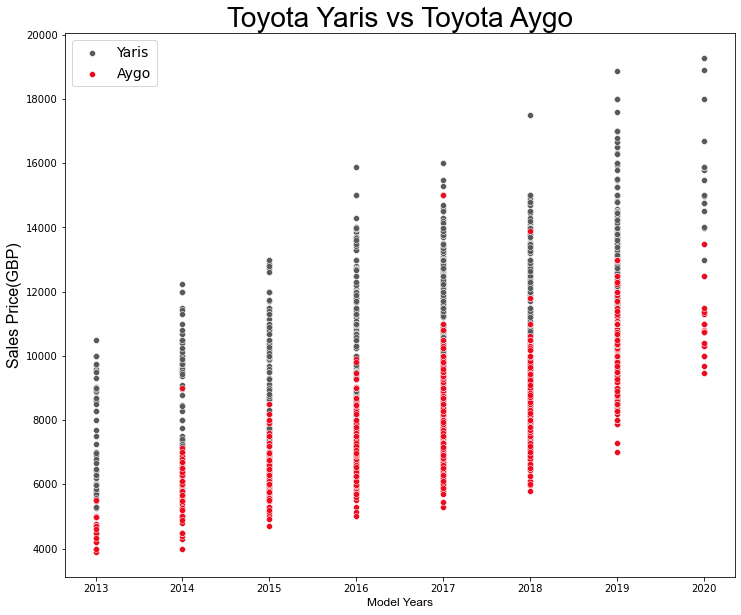

In [26]:
yaris= sns.scatterplot(data=yarisModel, x="year", y="price", color = "#58595B")
aygo = sns.scatterplot(data=aygoModel, x="year", y="price", color = "#EB0A1E", legend = True)
yaris.axes.set_title("Toyota Yaris vs Toyota Aygo", font = "Arial", fontsize = 28, color = "#000000")
yaris.set_ylabel("Sales Price(GBP)", font = "Arial", fontsize = 16, color = "#000000")
yaris.set_xlabel("Model Years", font = "Arial", fontsize = 12, color = "#000000")
yaris.legend(labels = ["Yaris", "Aygo"], fontsize = 14)
plt.gcf().set_size_inches(12,10)

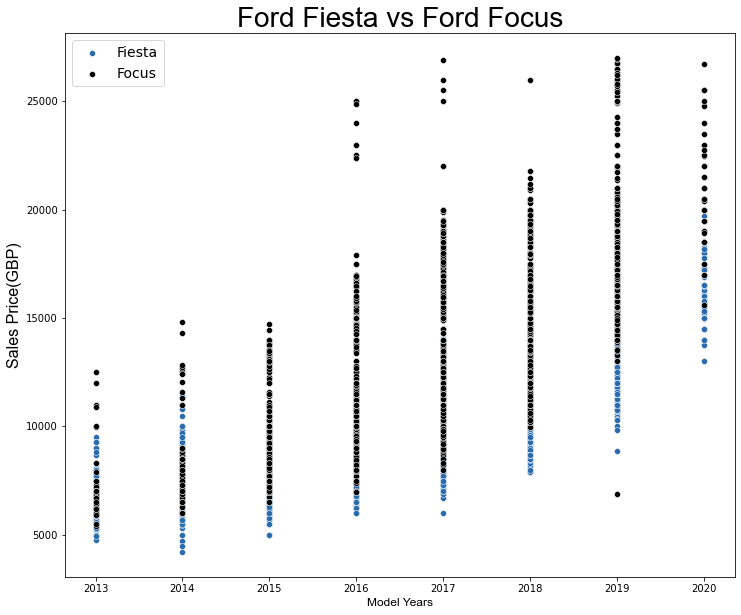

In [27]:
fiesta = sns.scatterplot(data=fiestaModel, x="year", y="price", color = "#2A6BAC")
focus = sns.scatterplot(data=focusModel, x="year", y="price", color = "#000000")
fiesta.axes.set_title("Ford Fiesta vs Ford Focus", font = "Arial", fontsize = 28, color = "#000000")
fiesta.set_ylabel("Sales Price(GBP)", font = "Arial", fontsize = 16, color = "#000000")
fiesta.set_xlabel("Model Years", font = "Arial", fontsize = 12, color = "#000000")
fiesta.legend(labels = ["Fiesta", "Focus"], fontsize = 14)
plt.gcf().set_size_inches(12,10)